<a href="https://colab.research.google.com/github/archangel2006/PYML-2025/blob/main/PYML15%20(Decision%20Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
features= ['pclass','sex','age','sibsp','parch','fare','embarked']
df=df[features+['survived']]

In [7]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
 7   survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.isnull().sum()

,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
survived,0


In [10]:
df['age'] = df['age'].fillna(df['age'].median())

/tmp/ipython-input-10-3541415502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].median())


In [11]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode())

/tmp/ipython-input-11-3103517670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].fillna(df['embarked'].mode())


In [12]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
survived,0


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

le_embarked = LabelEncoder()
df['embarked'] = le_embarked.fit_transform(df['embarked'])

In [15]:
x = df.drop('survived', axis=1)
y = df['survived']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# 2. Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
dt = DecisionTreeClassifier(random_state=42)

In [20]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
param_grid = {'max_depth':[3,5,7,None],
              'min_samples_split': [2,5,10],
              'criterion':['gini','entropy']}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# 6. GridSearchCV with s-fold cross-validation

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
# 7. Best hyperparameters

print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# 8. Cross-validated accuracy  of best model

cv_scores = cross_val_score(grid_search.best_estimator_,x_train,y_train,cv=5)
print(f'{cv_scores}')
np.mean(cv_scores)

[0.81118881 0.77622378 0.83098592 0.84507042 0.83802817]


np.float64(0.8202994188909681)

In [27]:
# 9. Ealuate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
confusion_matrix(y_test,y_pred)

array([[97, 13],
       [29, 40]])

In [30]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.88      0.82       110\n           1       0.75      0.58      0.66        69\n\n    accuracy                           0.77       179\n   macro avg       0.76      0.73      0.74       179\nweighted avg       0.76      0.77      0.76       179\n'

<Axes: >

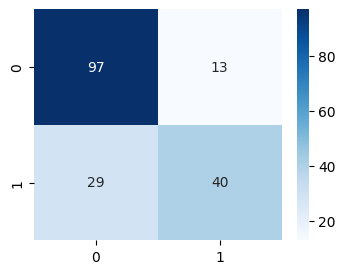

In [31]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')